## tests on mass/age prior

In [1]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
mf = mistfit.MistFit()

In [4]:
# observed Kmag, Teff, Fe/H, parallax (mas)
kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err\
= [ 8.84300000e+00,  1.40000000e-02,  5.71900000e+03, -1.20000000e-01, 7.27355841e+00,  3.00812913e-02]
teff_err, feh_err = 110, 0.1

In [5]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [192]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns*10)

### flat mass--linear age prior

In [193]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=True)

sample: 100%|███████████████████████████████| 220000/220000 [02:13<00:00, 1651.71it/s, 511 steps of size 4.86e-03. acc. prob=0.96]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      5.63      4.04      4.98      0.10     11.77  72583.67      1.00
  distance      4.04      2.33      3.61      0.62      7.42  96228.13      1.00
       eep    334.79     55.13    328.53    240.54    421.87  27848.56      1.00
       feh     -0.21      0.43     -0.19     -0.83      0.50  95029.39      1.00

Number of divergences: 680


In [195]:
samples = mf.samples

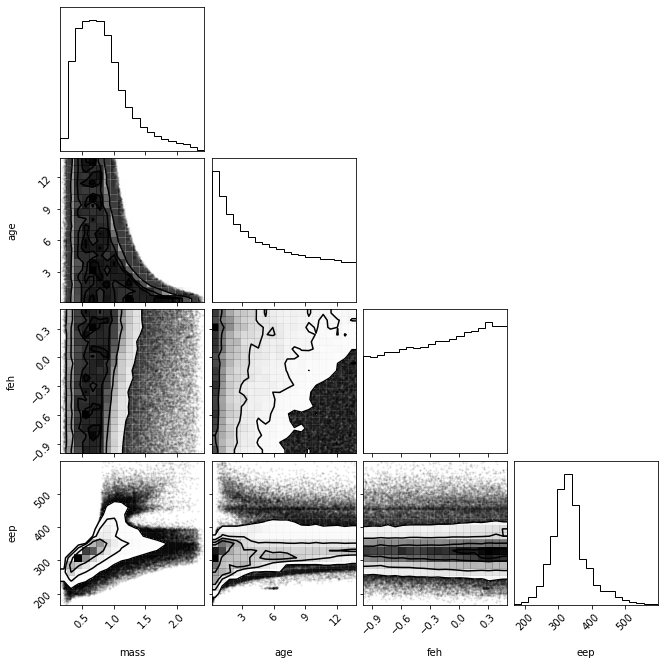

In [204]:
fig = corner.corner(np.array([samples['mass'], samples['age'], samples['feh'], samples['eep']]).T, labels=['mass', 'age', 'feh', 'eep'])

#### Is p(mass, age, feh) constant?

In [196]:
from sklearn.neighbors import KernelDensity
X = np.array([samples['mass']/3., samples['age']/10., samples['feh']]).T
kde = KernelDensity(kernel='gaussian', bandwidth=0.03).fit(X)

In [197]:
import matplotlib.pyplot as plt

In [198]:
N = 100

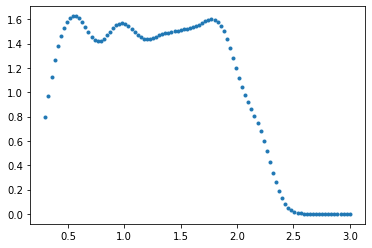

In [203]:
masses, ages, fehs = np.linspace(0.3, 3, N), np.ones(N)*1, np.ones(N)*(0.2)
log_probs = kde.score_samples(np.array([masses/3., ages/10., fehs]).T)
plt.plot(masses, np.exp(log_probs), '.')

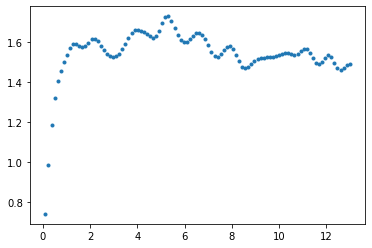

In [200]:
masses, ages, fehs = np.ones(N)*0.8, np.linspace(0.1, 13, N), np.ones(N)*0
log_probs = kde.score_samples(np.array([masses/3., ages/10., fehs]).T)
plt.plot(ages, np.exp(log_probs), '.')

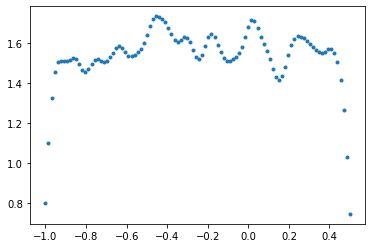

In [201]:
masses, ages, fehs = np.ones(N)*0.8, np.ones(N)*5, np.linspace(-1, 0.5, N)
log_probs = kde.score_samples(np.array([masses/3., ages/10., fehs]).T)
plt.plot(fehs, np.exp(log_probs), '.')

### flat mass--logage prior

In [16]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=False, flat_age_marginal=False, nodata=True)

sample: 100%|█████████████████| 100000/100000 [00:51<00:00, 1950.74it/s, 1023 steps of size 3.80e-03. acc. prob=0.96]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
  distance      4.08      2.35      3.64      0.60      7.43  23266.39      1.00
       eep    302.14     54.15    302.78    205.74    375.72   7400.64      1.00
       feh     -0.23      0.43     -0.21     -0.84      0.50  23888.29      1.00
    logage      8.86      0.56      8.80      8.00      9.70  15123.16      1.00

Number of divergences: 26


In [17]:
samples = mf.samples

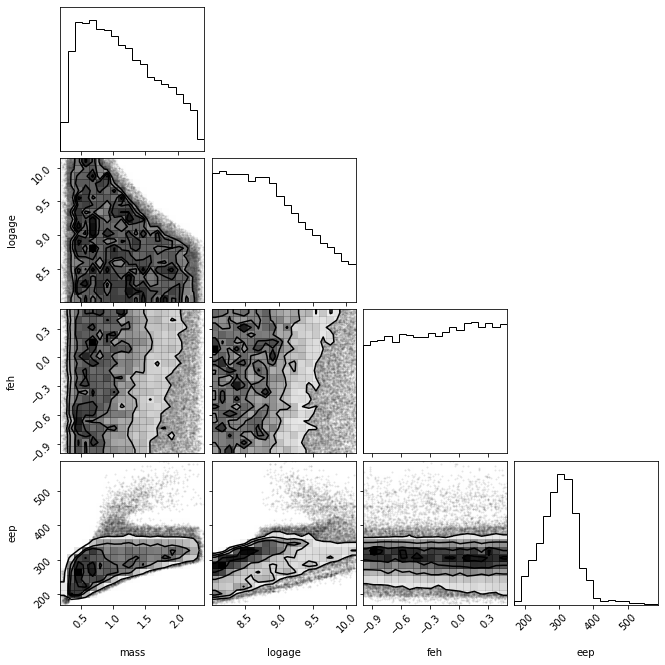

In [18]:
fig = corner.corner(np.array([samples['mass'], samples['logage'], samples['feh'], samples['eep']]).T, labels=['mass', 'logage', 'feh', 'eep'])

### flat marginal logage

In [13]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=False, flat_age_marginal=True, nodata=True)

sample: 100%|████████████| 40000/40000 [00:36<00:00, 1103.32it/s, 511 steps of size 8.82e-03. acc. prob=0.92]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
  distance      4.02      2.30      3.57      0.55      7.27   8167.85      1.00
       eep    311.52     56.26    311.25    215.82    395.40   2715.89      1.00
       feh     -0.25      0.43     -0.24     -0.86      0.48   8625.47      1.00
    logage      9.06      0.61      9.05      8.08      9.98   5155.76      1.00

Number of divergences: 48


In [14]:
samples = mf.samples

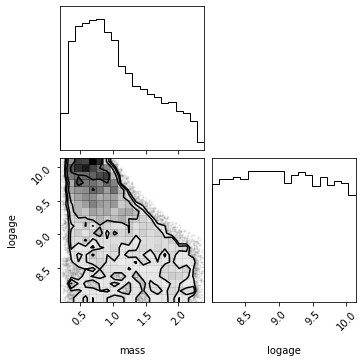

In [15]:
fig = corner.corner(np.array([samples['mass'], samples['logage']]).T, labels=['mass', 'logage'])

### flat marginal age

In [7]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=True, nodata=True)

sample: 100%|███████████| 40000/40000 [00:36<00:00, 1082.75it/s, 1023 steps of size 5.24e-03. acc. prob=0.96]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      6.83      3.95      6.72      1.19     13.47   8210.87      1.00
  distance      4.06      2.32      3.63      0.56      7.33   9953.92      1.00
       eep    339.59     54.45    331.53    252.46    430.36   2789.58      1.00
       feh     -0.25      0.43     -0.24     -0.89      0.46   9142.57      1.00

Number of divergences: 73


In [8]:
samples = mf.samples

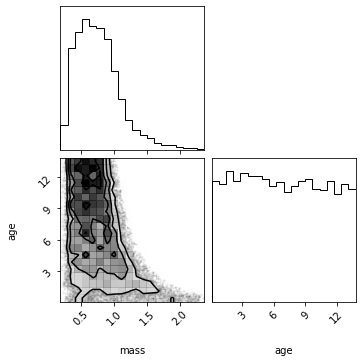

In [9]:
fig = corner.corner(np.array([samples['mass'], samples['age']]).T, labels=['mass', 'age'])